In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16,preprocess_input


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('Path to your main Directory')

# Data Loader 
## Here i have written custom Loop to read images and labels

In [ ]:
import os
import numpy as np
from sklearn.utils import shuffle
from PIL import Image

W = 224
H = 224
dataset = "images"
label_to_class = {'Fractured': 0, 'Non_fractured': 1}

Images = []
Classes = []

class_to_label = {v: k for k, v in label_to_class.items()}
n_classes = len(label_to_class)

for folder in os.listdir(dataset):
    img_folder = os.path.join(dataset, folder)
    cls = label_to_class[folder]
    i = 0

    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        try:
        # Use Pillow to open and resize the image
          img = Image.open(img_path)

          # Check if the image is grayscale
          if img.mode == 'L':
              img = img.convert('RGB')
          img = img.resize((W, H))
          # Convert to numpy array
          img = np.array(img)

        except Exception as e:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (W, H))
        Images.append(img)
        Classes.append(cls)


        if i == 800:
            break
        i = i + 1

Images = np.array(Images, dtype=np.float32)
Classes = np.array(Classes, dtype=np.float32)
Images, Classes = shuffle(Images, Classes, random_state=0)


In [ ]:
Images.shape, Classes.shape

((1518, 224, 224, 3), (1518,))

In [ ]:
Classes

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

# Spliting The data into train and Test

In [ ]:
## split train / test

indices_train, indices_test = train_test_split(list(range(Images.shape[0])), train_size=0.8, test_size=0.2, shuffle=True)

x_train = Images[indices_train]
y_train = Classes[indices_train]
x_test = Images[indices_test]
y_test = Classes[indices_test]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1214, 224, 224, 3), (1214,), (304, 224, 224, 3), (304,))

In [ ]:
y_test

array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1.

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

y_train.shape, y_test.shape

((1214, 2), (304, 2))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1214, 224, 224, 3), (1214, 2), (304, 224, 224, 3), (304, 2))

## Transformer Architecture Code + CNN Layer at the Start

In [ ]:
!pip install -U tensorflow-addons

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
num_classes = 2
input_shape = (224,224, 3)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1214, 224, 224, 3), (1214, 2), (304, 224, 224, 3), (304, 2))

### Hyperparameter

In [ ]:
learning_rate = 1e-3
weight_decay = 1e-4
image_size=224
batch_size = 256
num_epochs = 10
image_size = 224
patch_size = 8
num_patches = (image_size // patch_size) ** 2
projection_dim = 128
num_heads = 8
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 12
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier


### Data Augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.Rescaling(scale=1.0 / 255),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        # layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
        layers.RandomContrast(factor=0.2),  # Add contrast augmentation
        layers.RandomBrightness(factor=0.2),  # Add brightness augmentation
        # layers.RandomSaturation(factor=0.2),  # Add saturation augmentation
    ],
    name="data_augmentation",
)

# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


### Multilayer Perceptron

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


### Converting Image into Patches

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(patches.shape)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

### Patch Encoder

In [ ]:

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.expand_dims(
            tf.range(start=0, limit=self.num_patches, delta=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


### Model Architecture

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)

    # Augment data.
    augmented = data_augmentation(inputs)
    cnn_output = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(augmented)
    cnn_output = layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(cnn_output)
    cnn_output = layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(cnn_output)
    cnn_output = layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(cnn_output)
    cnn_output = layers.Conv2D(1, kernel_size=(1, 1), padding='same', activation='relu')(cnn_output)
    patches = Patches(patch_size)(cnn_output)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.2)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.2)

    # Classify outputs.
    logits = layers.Dense(num_classes, activation="softmax")(features)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


1/1 [==============================] - 7s 7s/step
[[0.90360373 0.09639627]]


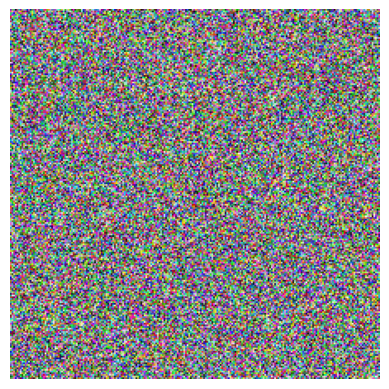

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
image_size=224
# Generate random noise
random_noise = np.random.random((image_size, image_size, 3))  # Assuming 3 channels for RGB

# Expand the dimensions to create a batch of size 1
random_noise = np.expand_dims(random_noise, axis=0)

# Call the model
model = create_vit_classifier()
output = model.predict(random_noise)

# Print the output
print(output)

# Display the random noise
plt.imshow(random_noise[0])
plt.axis("off")
plt.show()


In [ ]:
from matplotlib import pyplot
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report

### Model Training

In [1]:
# # # compile the model
model = create_vit_classifier()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate = learning_rate,
                                 weight_decay = weight_decay),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")],
)

model.summary()


In [1]:

# Assign class weight in case of imbalance and set it in model.fit too
# class_weight_dict = {0: 0.3, 1: 0.2}  # class weights directly

history = model.fit(
    x_train, y_train, batch_size=2, epochs=4, validation_data=(x_test, y_test)
)

# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)} %")


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred

In [ ]:
len(y_test),len(y_pred)

In [ ]:
y_testt=np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testt, y_pred)
cm

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [ ]:
classes = ['fractured','no fractured']
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=classes))


In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)} %")